# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Uploading a CSV file

In [2]:
netflix_data = pd.read_csv('/Users/abhishek.iwarkar/Downloads/NetFlix.csv')

# Data Preprocessing

In [3]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [5]:
netflix_data.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


# Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [6]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

In [7]:
(netflix_data.isna().sum() / len(netflix_data) * 100).round(2).sort_values(ascending=False)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
genres           0.00
description      0.00
dtype: float64

In [8]:
netflix_data = netflix_data.dropna()

In [9]:
netflix_data.shape

(4808, 12)

In [10]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

# Data Manipulation

Data manipulation is the process of arranging a set of data to make it more organized and easier to interpret.

In [11]:
netflix_data_updated = netflix_data.drop('description', axis=1)

In [12]:
netflix_data_updated.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers"
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies"
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies
5,s1002,Movie,Blue Ruin,Jeremy Saulnier,"Macon Blair, Devin Ratray, Amy Hargreaves, Kev...","United States, France",25-Feb-19,2013,R,90,"Independent Movies, Thrillers"
6,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",1-Jan-21,1999,PG-13,94,"Action & Adventure, Comedies"


In [13]:
netflix_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4808 non-null   object
 1   type          4808 non-null   object
 2   title         4808 non-null   object
 3   director      4808 non-null   object
 4   cast          4808 non-null   object
 5   country       4808 non-null   object
 6   date_added    4808 non-null   object
 7   release_year  4808 non-null   int64 
 8   rating        4808 non-null   object
 9   duration      4808 non-null   int64 
 10  genres        4808 non-null   object
dtypes: int64(2), object(9)
memory usage: 450.8+ KB


# Data Analysis

## Genres Analysis

In [14]:
genres_counts = netflix_data_updated["genres"].value_counts()
genres_counts

Dramas, International Movies                                     306
Stand-Up Comedy                                                  276
Comedies, Dramas, International Movies                           237
Dramas, Independent Movies, International Movies                 213
Children & Family Movies, Comedies                               158
                                                                ... 
Children & Family Movies, Documentaries, International Movies      1
Action & Adventure, Anime Features, Classic Movies                 1
Anime Features, Music & Musicals, Sci-Fi & Fantasy                 1
International Movies, Romantic Movies, Sci-Fi & Fantasy            1
Sci-Fi & Fantasy                                                   1
Name: genres, Length: 323, dtype: int64

In [15]:
genres_counts = netflix_data_updated.groupby("genres")["title"].count().sort_values(ascending=False)
genres_counts

genres
Dramas, International Movies                        306
Stand-Up Comedy                                     276
Comedies, Dramas, International Movies              237
Dramas, Independent Movies, International Movies    213
Children & Family Movies, Comedies                  158
                                                   ... 
Classic Movies, Dramas, Thrillers                     1
Classic Movies, Horror Movies, Thrillers              1
Classic Movies, Independent Movies, Thrillers         1
Classic Movies, Thrillers                             1
Children & Family Movies, Classic Movies, Dramas      1
Name: title, Length: 323, dtype: int64

In [16]:
top_genres = genres_counts.head(10)
top_genres

genres
Dramas, International Movies                        306
Stand-Up Comedy                                     276
Comedies, Dramas, International Movies              237
Dramas, Independent Movies, International Movies    213
Children & Family Movies, Comedies                  158
Documentaries                                       150
Comedies, International Movies                      146
Dramas, International Movies, Romantic Movies       143
Comedies, International Movies, Romantic Movies     132
Children & Family Movies                            126
Name: title, dtype: int64

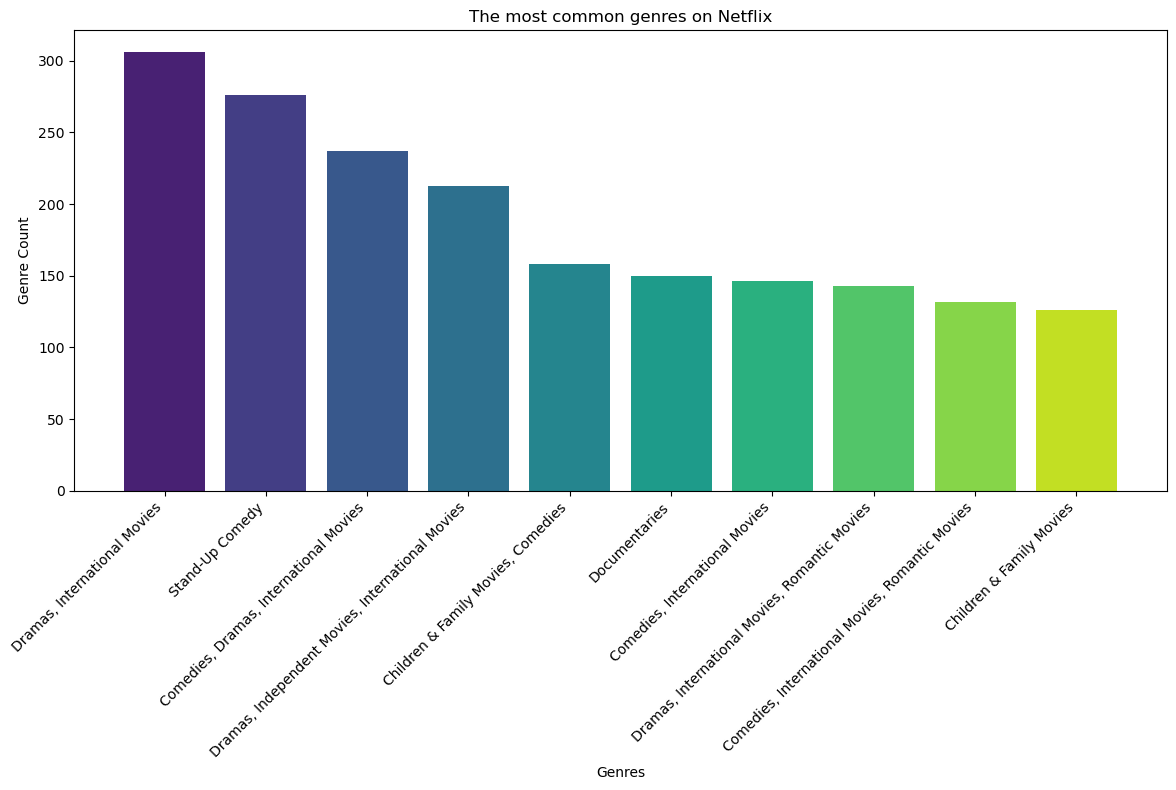

In [17]:
plt.figure(figsize=(12, 8))

top_genres_sorted=top_genres.sort_values(ascending=False)
palette = sns.color_palette("viridis", len(top_genres_sorted))

plt.bar(x=top_genres_sorted.index, height=top_genres_sorted.values, width=0.8, align='center', color=palette)
plt.title("The most common genres on Netflix")
plt.xlabel("Genres")
plt.ylabel("Genre Count")

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

## Top 15 countries by Movies count

In [18]:
countries = netflix_data_updated['country'].str.split(', ').explode()

In [19]:
top_15_countries = countries.value_counts().head(15)
print(top_15_countries)

United States     2181
India              891
United Kingdom     426
Canada             263
France             254
Spain              147
Germany            143
Japan              108
China               98
Egypt               95
Hong Kong           95
Mexico              91
Turkey              83
Philippines         76
Australia           76
Name: country, dtype: int64


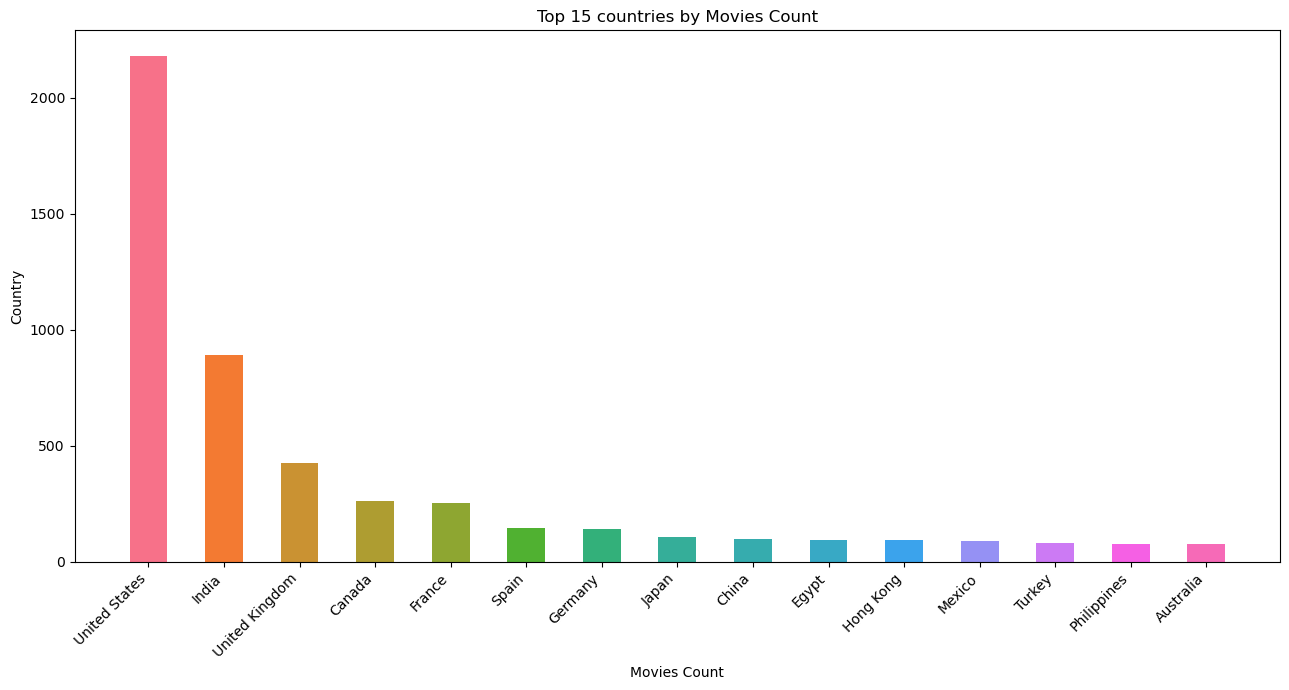

In [20]:
plt.figure(figsize=(13,7))


top_15_countries_sorted = top_15_countries.sort_values(ascending=False)

palette = sns.color_palette("husl", len(top_15_countries_sorted))

plt.bar(x=top_15_countries_sorted.index, height=top_15_countries_sorted.values, width=0.5, align='center', color=palette)
plt.title("Top 15 countries by Movies Count")
plt.ylabel("Country")
plt.xlabel("Movies Count")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()

The United States stands out from the rest of the world. But I don't think it's surprising. The US film industry is the most developed in the world.

The top 5 countries are as follows:

United States - 2181, 
India - 891,
United Kingdom - 426,
Canada - 263, 
France - 254 

## Release Per Year

In [21]:
release_per_year = netflix_data_updated.groupby("release_year")["title"].count()
release_per_year

release_year
1942      1
1944      1
1945      1
1946      1
1947      1
       ... 
2017    645
2018    624
2019    488
2020    379
2021      4
Name: title, Length: 71, dtype: int64

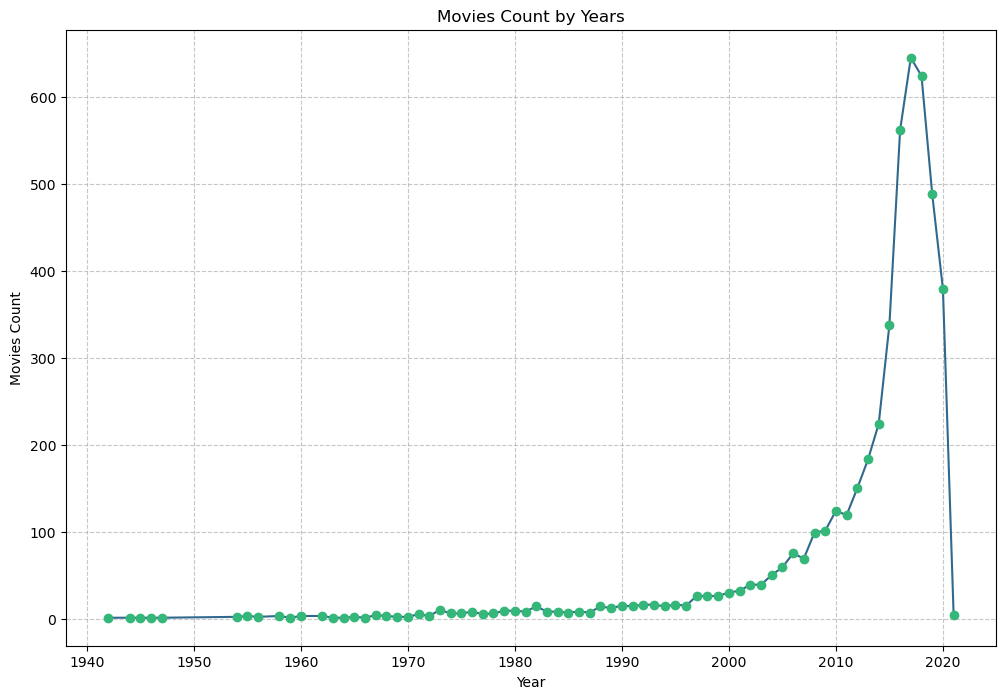

In [22]:
plt.figure(figsize=(12, 8))

palette = sns.color_palette("viridis", 2)


plt.plot(release_per_year.index, release_per_year.values, color=palette[0], linestyle='-')

plt.plot(release_per_year.index, release_per_year.values, color=palette[1], marker='o', linestyle='')

plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel("Year")
plt.ylabel("Movies Count")
plt.title("Movies Count by Years")

plt.show()

## Analysis of Directors

In [23]:
directors=netflix_data_updated["director"].str.split(', ').explode()
director_count=directors.value_counts()
director_count

Jan Suter              21
Raúl Campos            19
Jay Karas              15
Marcus Raboy           15
Cathy Garcia-Molina    13
                       ..
Andrés Couturier        1
Tim Johnson             1
Rodolphe Guenoden       1
Yusuf Pirhasan          1
Woody Allen             1
Name: director, Length: 3961, dtype: int64

In [24]:
director_count.describe()

count    3961.000000
mean        1.361020
std         1.088245
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        21.000000
Name: director, dtype: float64

In total, this dataset contains about 3961 directors. The average number of films for each director is about 1, but there are exceptions. The maximum number of films on Netflix by one director is 21. It is interesting to know which directors are the most attractive for Netflix.

## Top 25 Directors by Number of Films¶

In [25]:
top_25_directors=director_count.head(25)
top_25_directors

Jan Suter              21
Raúl Campos            19
Jay Karas              15
Marcus Raboy           15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Steven Spielberg       10
David Dhawan            9
Shannon Hartman         9
Anurag Kashyap          9
Johnnie To              8
Yılmaz Erdoğan          8
Umesh Mehra             8
Robert Rodriguez        8
Hakan Algül             8
Justin G. Dyck          8
Ryan Polito             8
Dibakar Banerjee        7
Lance Bangs             7
Leslie Small            7
Kunle Afolayan          7
McG                     7
Quentin Tarantino       7
Name: director, dtype: int64

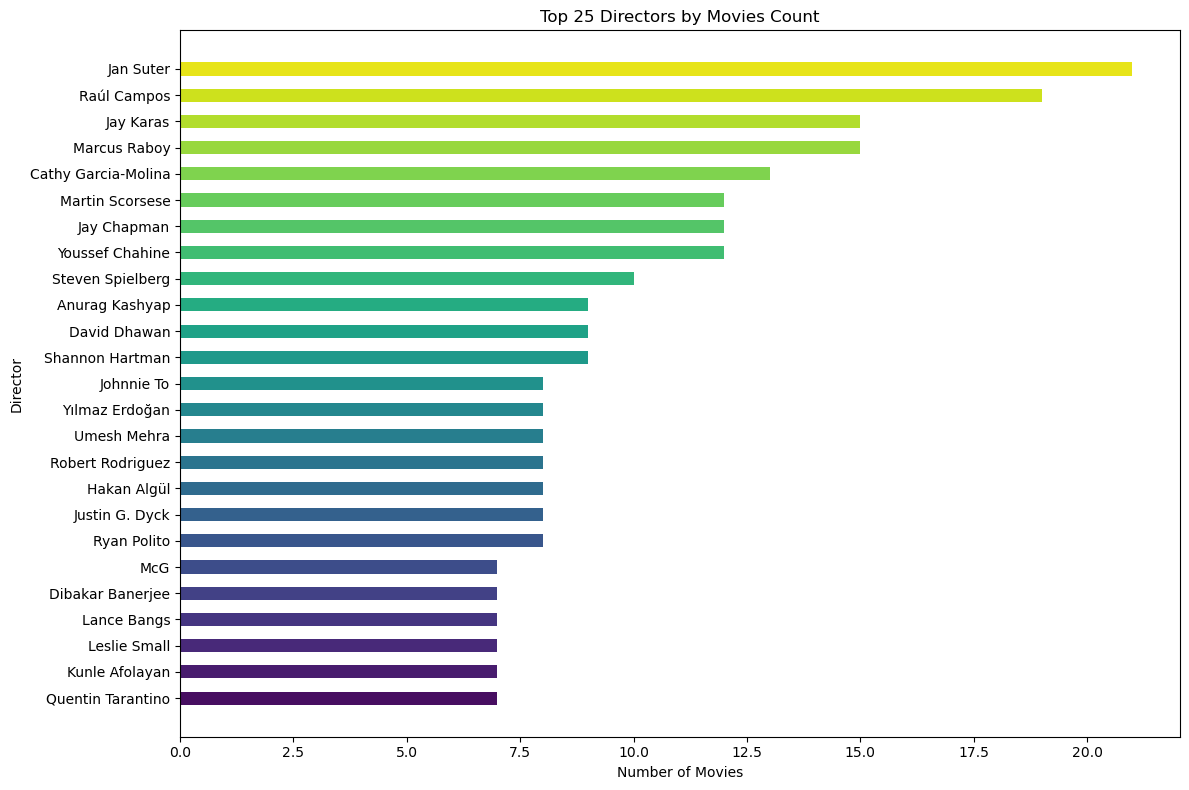

In [26]:
plt.figure(figsize=(12,8))


top_25_directors_sorted=top_25_directors.sort_values(ascending= True)

palette = sns.color_palette("viridis", len(top_25_directors_sorted))


plt.barh(y=top_25_directors_sorted.index, width=top_25_directors_sorted.values, height=0.5, align='center', color=palette)
plt.ylabel("Director")
plt.xlabel("Number of Movies")
plt.title("Top 25 Directors by Movies Count")

plt.tight_layout()  
plt.show()

## Content Analysis

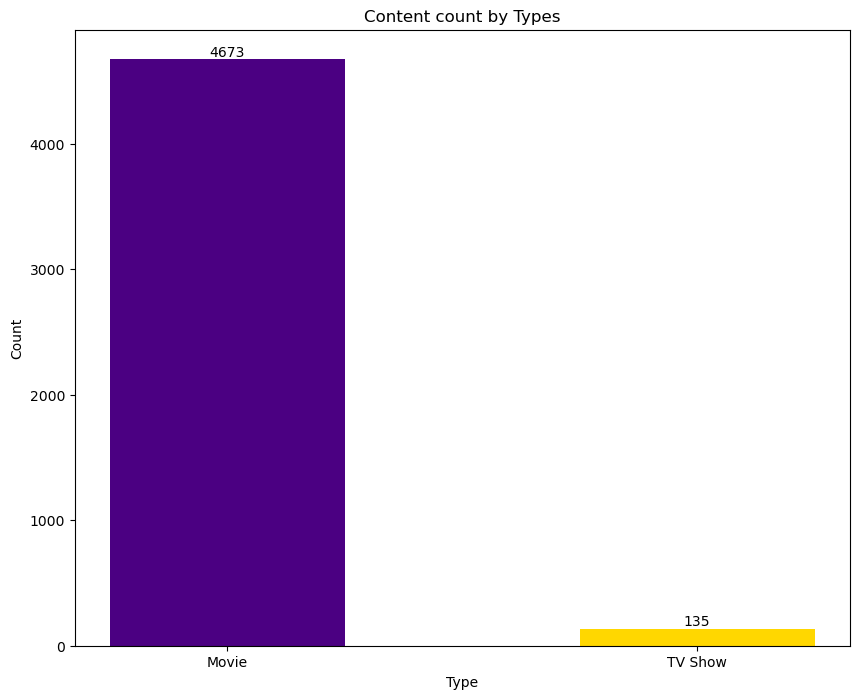

In [28]:
plt.figure(figsize=(10, 8))

netflix_type_count=netflix_data_updated.groupby("type")["title"].count()

colors = ['indigo', 'gold']

plt.bar(x=netflix_type_count.index, height=netflix_type_count.values, align='center', width=0.5, color=colors)

plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Content count by Types")

for i, value in enumerate(netflix_type_count.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

## Most Common Movie Ratings

In [29]:
ratings=netflix_data_updated.groupby("rating")["title"].count().sort_values(ascending=False)
ratings

rating
TV-MA       1665
TV-14       1133
R            654
TV-PG        413
PG-13        375
PG           238
TV-G          80
TV-Y          71
TV-Y7         69
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: title, dtype: int64

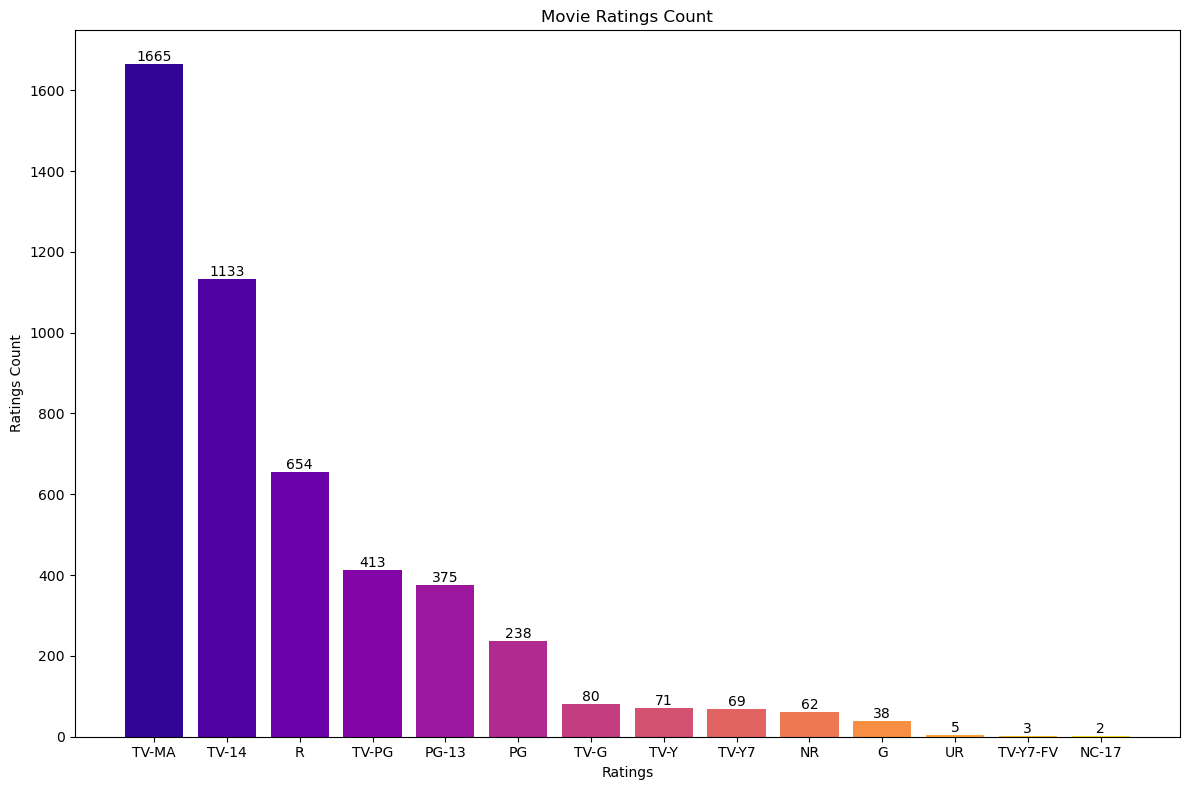

In [30]:
plt.figure(figsize=(12, 8))


ratings_sorted = ratings.sort_values(ascending=False)

palette = sns.color_palette("plasma", len(ratings_sorted))

plt.bar(x=ratings_sorted.index, height=ratings_sorted.values, width=0.8, align='center', color=palette)

plt.xlabel('Ratings')
plt.ylabel('Ratings Count')
plt.title("Movie Ratings Count")

for i, value in enumerate(ratings_sorted.values):
    plt.text(i,value,str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

## To Check the Correlation

In [31]:
netflix_data_corr =netflix_data_updated.copy()
netflix_data_corr = netflix_data_corr.drop(columns = ['show_id', 'date_added'])

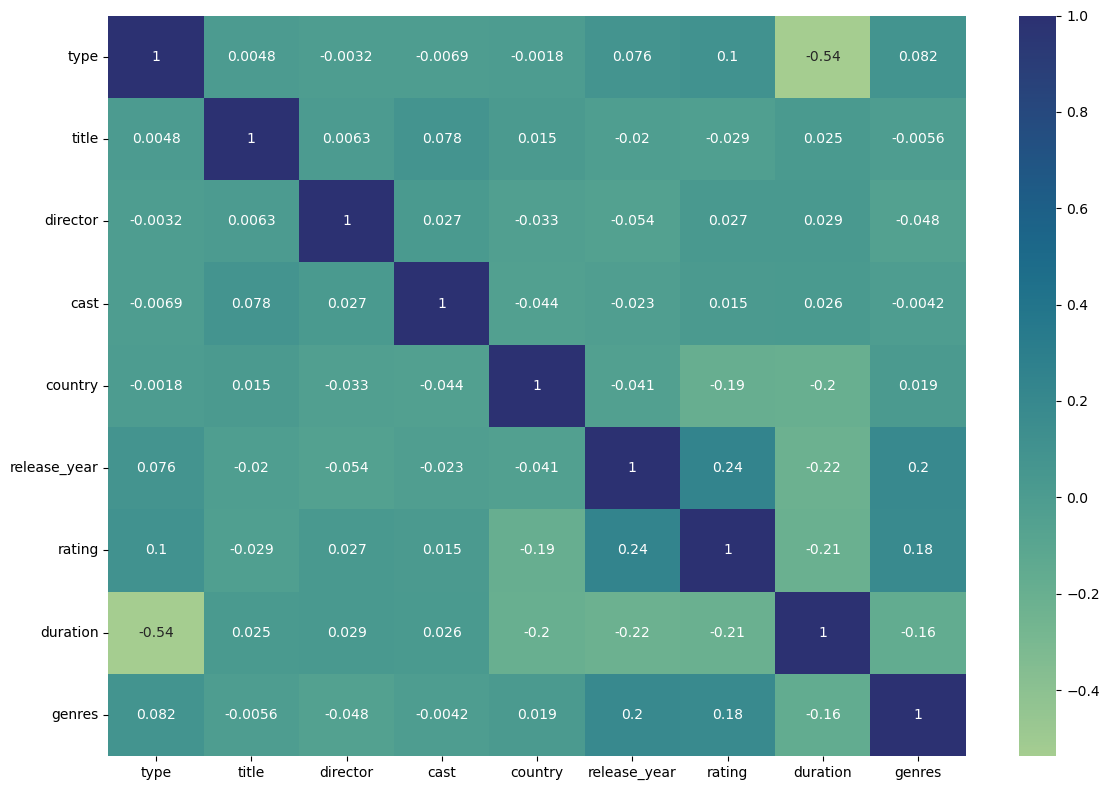

In [32]:
columns_to_encode = ['type', 'title', 'director', 'cast', 'country', 'release_year', 'rating', 'genres']

for col in columns_to_encode:
    netflix_data_corr[col] = label_encoder.fit_transform(netflix_data_corr[col])
    
plt.figure(figsize = (12,8))
sns.heatmap(netflix_data_corr.corr(), annot=True, cmap='crest')

plt.tight_layout()
plt.show()

In [33]:
netflix_data_corr.corr()

,type,title,director,cast,country,release_year,rating,duration,genres
type,1.000000,0.004783,-0.003193,-0.006873,-0.001826,0.076358,0.103973,-0.537221,0.082485
title,0.004783,1.000000,0.006278,0.077721,0.015290,-0.019660,-0.028845,0.025297,-0.005595
director,-0.003193,0.006278,1.000000,0.027133,-0.033010,-0.053786,0.027415,0.029242,-0.047546
cast,-0.006873,0.077721,0.027133,1.000000,-0.044383,-0.022876,0.015363,0.025695,-0.004225
country,-0.001826,0.015290,-0.033010,-0.044383,1.000000,-0.040948,-0.194658,-0.199312,0.019262
release_year,0.076358,-0.019660,-0.053786,-0.022876,-0.040948,1.000000,0.242721,-0.223271,0.195104
rating,0.103973,-0.028845,0.027415,0.015363,-0.194658,0.242721,1.000000,-0.212780,0.180402
duration,-0.537221,0.025297,0.029242,0.025695,-0.199312,-0.223271,-0.212780,1.000000,-0.162818
genres,0.082485,-0.005595,-0.047546,-0.004225,0.019262,0.195104,0.180402,-0.162818,1.000000


Correlation Coefficient Values:

The correlation coefficient ranges from -1 to 1.
A correlation coefficient of 1 indicates a perfect positive correlation, meaning the two variables move perfectly in the same direction.
A correlation coefficient of -1 indicates a perfect negative correlation, meaning the two variables move perfectly in opposite directions.
A correlation coefficient of 0 indicates no linear correlation between the variables.